In [12]:
import pandas as pd

dataframe = pd.read_csv("bank.csv")
print(f"1. Dataset Information: {dataframe.info()}\n")

# : (before the comma): This means select all rows.
# 1 (after the comma): This means select the second column (since indexing starts at 0).
object_columns = [col for i, col in enumerate(dataframe.columns) if dataframe.iloc[:, i].dtype == 'object']
# object_columns = [col for i, col in enumerate(dataframe.columns) if dataframe.iloc[:, i].dtype == 'int64']
print(f"a. Dataset Info of the dtypes=object are {object_columns}\n")

print("b. ")
for col in dataframe:
    print(f"Unique values in column {col}:")
    print(dataframe[col].unique())

null_values = dataframe.isnull().sum()
print(f"\nc. Null values in each column:\n{null_values}")

int_dataframe = dataframe.drop(columns = object_columns)
int_dataframe.to_csv("bankNumericData.csv", index = False);

new_dataframe = pd.read_csv("bankNumericdata.csv")
print(f"\nSummary Satistics of the new DataFrame: \n {new_dataframe.describe()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CustomerID   6 non-null      int64  
 1   Name         6 non-null      object 
 2   Age          5 non-null      float64
 3   Gender       6 non-null      object 
 4   Balance      6 non-null      int64  
 5   AccountType  6 non-null      object 
 6   LoanStatus   6 non-null      object 
 7   Region       5 non-null      object 
dtypes: float64(1), int64(2), object(5)
memory usage: 516.0+ bytes
1. Dataset Information: None

a. Dataset Info of the dtypes=object are ['Name', 'Gender', 'AccountType', 'LoanStatus', 'Region']

b. 
Unique values in column CustomerID:
[101 102 103 104 105 106]
Unique values in column Name:
['John Doe' 'Jane Smith' 'Michael Brown' 'Susan Lee' 'Chris Johnson'
 'Karen Adams']
Unique values in column Age:
[35. 28. 45. 33. 40. nan]
Unique values in column Gender:
['Male' 'Female

In [15]:
import pandas as pd

medical_df = pd.read_csv("medical_student.csv")
print(f"1. Medical Datafram:\n{medical_df}\n")

print(f"2. DataFrame information: {medical_df.info()}")

null_values = medical_df.isnull().sum()
print(f"\n2. Null value in each column:\n{null_values}")

# medical_df.fillna(method="ffill") #Copy the previous table value
medical_df['Age'] = medical_df['Age'].fillna(medical_df['Age'].median())
medical_df['Specialization'] = medical_df['Specialization'].fillna(medical_df['Specialization'].mode()[0])
print(f"\n3. Missing Value Optimization:\n{medical_df}")

duplicates = medical_df.duplicated().sum()
print(f"\n4. Number of duplicate rows: {duplicates}")
if duplicates > 0:
    medical_df = medical_df.drop_duplicates()
print(f"After removing duplicates:\n{medical_df}")

1. Medical Datafram:
    StudentID             Name   Age  Gender  Year      Specialization
0           1         John Doe  22.0    Male   2.0          Cardiology
1           2       Jane Smith  23.0  Female   3.0           Neurology
2           3    Emily Johnson  24.0  Female   NaN         Orthopedics
3           4    Michael Brown   NaN    Male   1.0    General Medicine
4           5     Olivia Davis  25.0  Female   3.0          Pediatrics
5           6     James Wilson  26.0    Male   4.0            Oncology
6           7   Isabella Moore  22.0  Female   2.0             Surgery
7           8    Daniel Taylor  23.0    Male   3.0           Radiology
8           9  Sophia Anderson  24.0  Female   4.0  Emergency Medicine
9          10   Matthew Thomas  21.0    Male   1.0                 NaN
10          1         John Doe  22.0    Male   2.0          Cardiology
11          2         John Doe  22.0    Male   2.0          Cardiology

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 en

In [4]:
import pandas as pd

titanic_df = pd.read_csv("titanic.csv")
one_hot_encoding = pd.get_dummies(titanic_df['Embarked'], prefix='Embarked')

titanic_df = pd.concat([titanic_df, one_hot_encoding], axis = 1)

titanic_df.drop(columns= ['Embarked'], inplace = True)

print(titanic_df.head())

   PassengerId  Pclass       Name     Sex  Age  Survived  Embarked_C  \
0            1       1     Braund    male   22         1       False   
1            2       1    Cumings  female   38         0        True   
2            3       1  Heikkinen  female   26         0       False   
3            4       1   Futrelle  female   35         1       False   
4            5       1      Allen    male   35         1       False   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  


Mean survival rates by gender:
Sex
female    0.666667
male      0.625000
Name: Survived, dtype: float64



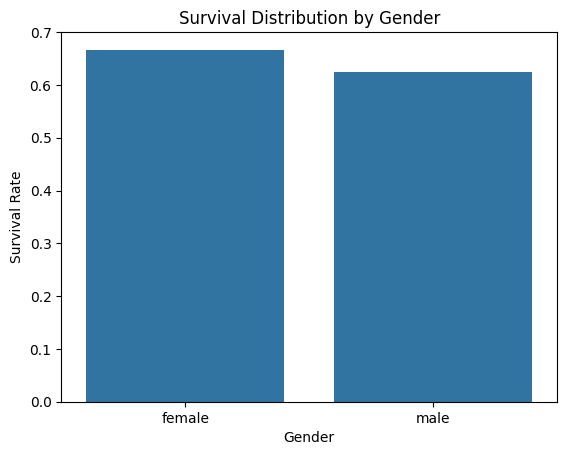

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# mean_survival_male = titanic_df.loc[titanic_df['Sex'] == 'male', 'Survived'].mean()
# mean_survival_female = titanic_df.loc[titanic_df['Sex'] == 'female', 'Survived'].mean()
mean_survival_by_gender = titanic_df.groupby('Sex')['Survived'].mean()

# print(f"Mean Survival rates of male: {mean_survival_male}")
# print(f"Mean Survival rates of Female: {mean_survival_female}")
print(f"Mean survival rates by gender:\n{mean_survival_by_gender}\n")

sns.barplot(x=mean_survival_by_gender.index, y=mean_survival_by_gender.values)
# sns.barplot(x=['Male', 'Female'], y=[mean_survival_male, mean_survival_female])

plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


Mean survival rates by Embarked port:
Embarked
C    0.500000
Q    1.000000
S    0.647059
Name: Survived, dtype: float64



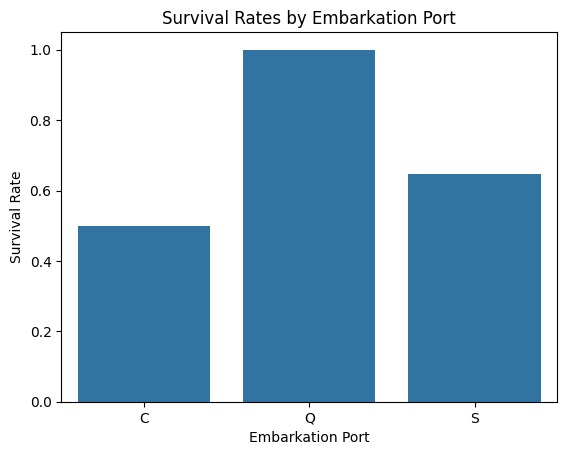

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_df = pd.read_csv("titanic.csv")

mean_survival_by_embarked = titanic_df.groupby('Embarked')['Survived'].mean()

print(f"Mean survival rates by Embarked port:\n{mean_survival_by_embarked}\n")

sns.barplot(x=mean_survival_by_embarked.index, y=mean_survival_by_embarked.values)

plt.title('Survival Rates by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_18624\3307887130.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_survival_by_age_class = titanic_df.groupby(['Age Group', 'Pclass'])['Survived'].mean().reset_index()


  Age Group  Pclass  Survived
0        Q1       1  1.000000
1        Q1       2  1.000000
2        Q2       1  0.500000
3        Q2       2  0.000000
4        Q3       1  1.000000
5        Q3       2  1.000000
6        Q4       1  0.666667
7        Q4       2  0.000000
8        Q5       1  0.000000
9        Q5       2  0.666667


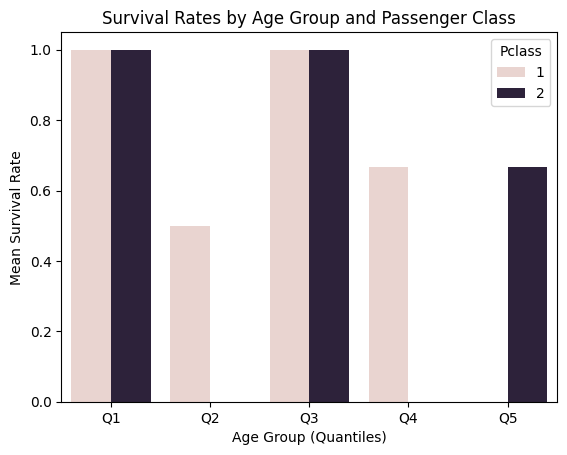

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

titanic_df['Age Group'] = pd.qcut(titanic_df['Age'], 5, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'])
mean_survival_by_age_class = titanic_df.groupby(['Age Group', 'Pclass'])['Survived'].mean().reset_index()

print(mean_survival_by_age_class)

sns.barplot(data=mean_survival_by_age_class, x='Age Group', y='Survived', hue='Pclass')

plt.title('Survival Rates by Age Group and Passenger Class')
plt.xlabel('Age Group (Quantiles)')
plt.ylabel('Mean Survival Rate')
plt.legend(title='Pclass')

plt.show()
